## 1. Импорт пакетов и файла

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузка данных
data = pd.read_csv('real_estate_data.csv')

In [3]:
data = data[data['listing_type'] == 1]

In [4]:
data.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
5,6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,1+1,45.0,İstanbul/Maltepe/Altayçeşme,NaN,Fancoil,780000.0,TRY


### Описание данных

Признаки:
- type - Тип недвижимости
- sub_type - Подгруппа типа недвижимости
- start_date - Дата начала размещения объявления на рынке
- end_date - Дата окончания размещения объявления на рынке
- listing_type - Тип объявления
- tom - Время нахождения на рынке
- building_age - Возраст здания
- total_floor_count - Количество этажей в здании
- room_count - Количество комнат в квартире
- size - Площадь дома
- address - Адрес жилья
- furnished - Наличие мебели
- currency - Валюта цены дома
- floor_no - Информация о номере этажа данного объявления
- heating_type - Различные типы систем отопления

Целевой (искомый) признак:
- price - Цена дома (или аренды)

In [5]:
# объём данных (строк и столбцов - объектов и признаков)
data.shape

(287009, 17)

In [6]:
# выводим типы данных
data.dtypes

id                     int64
type                  object
sub_type              object
start_date            object
end_date              object
listing_type           int64
tom                    int64
building_age          object
total_floor_count     object
floor_no              object
room_count            object
size                 float64
address               object
furnished            float64
heating_type          object
price                float64
price_currency        object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287009 entries, 1 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 287009 non-null  int64  
 1   type               287009 non-null  object 
 2   sub_type           287009 non-null  object 
 3   start_date         287009 non-null  object 
 4   end_date           183273 non-null  object 
 5   listing_type       287009 non-null  int64  
 6   tom                287009 non-null  int64  
 7   building_age       269448 non-null  object 
 8   total_floor_count  268390 non-null  object 
 9   floor_no           261755 non-null  object 
 10  room_count         287009 non-null  object 
 11  size               184756 non-null  float64
 12  address            287009 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       268428 non-null  object 
 15  price              286420 non-null  float64
 16  price_c

In [8]:
# имена колонок в виде списка
columns = data.columns
columns

Index(['id', 'type', 'sub_type', 'start_date', 'end_date', 'listing_type',
       'tom', 'building_age', 'total_floor_count', 'floor_no', 'room_count',
       'size', 'address', 'furnished', 'heating_type', 'price',
       'price_currency'],
      dtype='object')

In [9]:
# подсчет пропусков
for col in data.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, data[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 103736
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 17561
Кол-во пропусков в колонке total_floor_count = 18619
Кол-во пропусков в колонке floor_no = 25254
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 102253
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 287009
Кол-во пропусков в колонке heating_type = 18581
Кол-во пропусков в колонке price = 589
Кол-во пропусков в колонке price_currency = 589


In [10]:
# Проверьте price и price_currency на наличие проблем
print("Счетчик нулей у price:", data['price'].isnull().sum())
print("Счетчик нулей у price_currency:", data['price_currency'].isnull().sum())
print("Уникальные значения price_currency:", data['price_currency'].unique())

Счетчик нулей у price: 589
Счетчик нулей у price_currency: 589
Уникальные значения price_currency: ['TRY' 'GBP' 'EUR' 'USD' nan]


In [11]:
# Конвертация цены в TRY
data['price'] = pd.to_numeric(data['price'], errors='coerce')
def convert_to_try(row):
    try:
        price = row['price']
        if pd.isna(price):
            return np.nan
        rates = {'USD': 41.15, 'EUR': 48.17, 'GBP': 55.60}
        return price * rates.get(row['price_currency'], 1)  # 1 для TRY или unknown
    except:
        return np.nan

data['price_try'] = data.apply(convert_to_try, axis=1)
data = data.dropna(subset=['price_try'])  # Удаляем NaN в цене

In [12]:
# Удаляем строки с пропусками в price_try
print("Строки с NaN в price_try до удаления:", data['price_try'].isnull().sum())
data = data.dropna(subset=['price_try'])
print("Строки с NaN в price_try после удаления:", data['price_try'].isnull().sum())

Строки с NaN в price_try до удаления: 0
Строки с NaN в price_try после удаления: 0


In [13]:
# Удаляем не значимые колонки (оставляем listing_type)
data = data.drop(['id', 'start_date', 'end_date', 'furnished', 'price', 'price_currency'], axis=1)

In [14]:
data['city'] = data['address'].str.split('/').str[0].fillna('Unknown')
data['district'] = data['address'].str.split('/').str[1].fillna('Unknown')
data['neighborhood'] = data['address'].str.split('/').str[2].fillna('Unknown')

In [15]:
data = data.drop(['address'], axis=1)

In [16]:
# Заменям пропуски медианными значениями
data['size'] = data['size'].replace('', np.nan).astype(float)
data['size'].fillna(data['size'].median(), inplace=True)

In [17]:
# Конвертируем building_age в число
data['building_age'] = data['building_age'].replace('0', '0-5 arası').replace('40 ve üzeri', '40').replace('', np.nan)
data['building_age'] = data['building_age'].apply(lambda x: 0 if pd.isna(x) else int(x.split('-')[0]) if 'arası' in str(x) else int(x))

In [18]:
# Конвертируем total_floor_count в число
data['total_floor_count'] = data['total_floor_count'].replace('20 ve üzeri', '20').replace('', np.nan)
data['total_floor_count'] = data['total_floor_count'].apply(lambda x: np.nan if pd.isna(x) else float(x.split('-')[0]) if 'arası' in str(x) else float(x))
data['total_floor_count'].fillna(data['total_floor_count'].median(), inplace=True)

In [19]:
# Конвертируем floor_no в числа
floor_mapping = {
    'Zemin Kat': 0, 'Giriş Katı': 0, 'Yüksek Giriş': 1, 'Bahçe katı': 0,
    'Kot 2': -2, 'Kot1': -1, 'Asma Kat': 0.5, 'Çatı Katı': 100, 'En Üst Kat': 100,
    '20 ve üzeri': 20
}
data['floor_no'] = data['floor_no'].replace(floor_mapping).replace('', np.nan)
data['floor_no'] = pd.to_numeric(data['floor_no'], errors='coerce')
data['floor_no'].fillna(data['floor_no'].median(), inplace=True)

In [20]:
# Конвертируем room_count в числа
def parse_room_count(x):
    if pd.isna(x) or x == '' or x == '+':
        return np.nan
    try:
        parts = x.split('+')
        return sum(int(part) for part in parts if part.strip().isdigit())
    except:
        return np.nan

In [21]:
data['room_count'] = data['room_count'].apply(parse_room_count)
data['room_count'].fillna(data['room_count'].median(), inplace=True)

In [22]:
# Дополнительные фичи
data['price_per_m2'] = data['price_try'] / data['size'].clip(lower=1)  # Избегаем деления на 0
data['age_size_interact'] = data['building_age'] * data['size']  # Взаимодействие

# Фильтрация выбросов
data = data[(data['price_try'] > 1000) & (data['price_try'] < 1e9)]
data = data[(data['size'] > 10) & (data['size'] < 5000)]

In [23]:
# Разделяем на категории
categorical_cols = ['type', 'sub_type', 'heating_type', 'district', 'neighborhood', 'city']
for col in categorical_cols:
    data[col] = data[col].replace('', np.nan).fillna('Unknown')
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

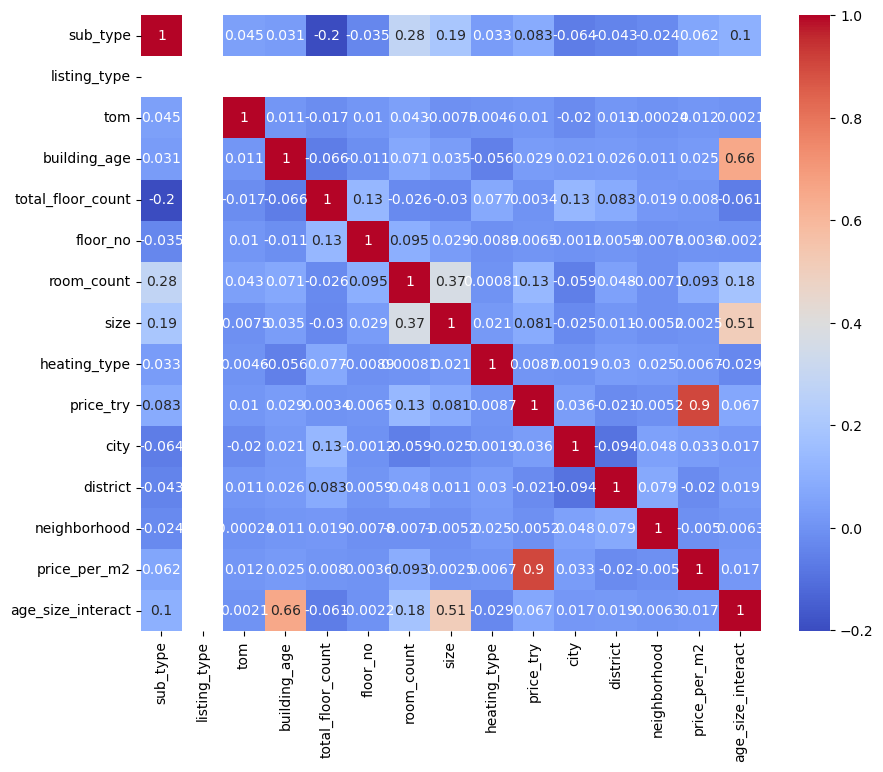

In [24]:
# Матрица корреляций
corr_matrix = data.drop(columns=['type']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [25]:
# Определяем свойства и целевую переменную
X = data.drop('price_try', axis=1)
y = data['price_try']

In [26]:
# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Создаем модели
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
xgb_model = XGBRegressor(n_estimators=50, tree_method='gpu_hist', subsample=0.8, early_stopping_rounds=10, random_state=42)
stacking_model = StackingRegressor(
    estimators=[('dt', DecisionTreeRegressor(max_depth=5, random_state=42)), ('ridge', Ridge())],
    final_estimator=LinearRegression(), cv=3
)

In [28]:
models = {
    'Random Forest': rf_model,
    'Gradient Boosting (XGBoost)': xgb_model,
    'Stacking': stacking_model
}

In [29]:
param_grid = {'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
grid = GridSearchCV(xgb_model, param_grid, cv=3)
grid.fit(X_train, y_train, eval_set=[(X_test, y_test)])
xgb_model = grid.best_estimator_

[0]	validation_0-rmse:5733720.23912
[1]	validation_0-rmse:5721250.47573
[2]	validation_0-rmse:5700783.03251
[3]	validation_0-rmse:5688347.71935
[4]	validation_0-rmse:5675925.16921
[5]	validation_0-rmse:5662665.26049
[6]	validation_0-rmse:5641642.14387
[7]	validation_0-rmse:5622704.73019
[8]	validation_0-rmse:5611050.51695
[9]	validation_0-rmse:5592426.42189
[10]	validation_0-rmse:5581581.43195
[11]	validation_0-rmse:5569819.41111
[12]	validation_0-rmse:5559013.50399
[13]	validation_0-rmse:5549134.35152
[14]	validation_0-rmse:5539321.65575
[15]	validation_0-rmse:5529626.52410
[16]	validation_0-rmse:5519541.60253
[17]	validation_0-rmse:5502470.50924
[18]	validation_0-rmse:5492866.70910
[19]	validation_0-rmse:5476137.91528
[20]	validation_0-rmse:5459349.71388
[21]	validation_0-rmse:5442314.42377
[22]	validation_0-rmse:5427115.36676
[23]	validation_0-rmse:5411700.79702
[24]	validation_0-rmse:5402735.01863
[25]	validation_0-rmse:5386701.74106
[26]	validation_0-rmse:5377747.13600
[27]	valida

In [30]:
# Обучаем модели
results = {}
predictions = {}
for name, model in models.items():
    if (name == 'Gradient Boosting (XGBoost)'):
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    predictions[name] = y_pred
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Random Forest - MSE: 3133107266346.02, R2: 0.91
[0]	validation_0-rmse:5446831.68096
[1]	validation_0-rmse:5243198.79012
[2]	validation_0-rmse:5094592.01527
[3]	validation_0-rmse:5041461.18367
[4]	validation_0-rmse:5027268.57330
[5]	validation_0-rmse:4997250.11168
[6]	validation_0-rmse:5054456.13705
[7]	validation_0-rmse:5080145.78716
[8]	validation_0-rmse:5086714.98601
[9]	validation_0-rmse:5148968.81606
[10]	validation_0-rmse:5138398.86081
[11]	validation_0-rmse:5174932.34272
[12]	validation_0-rmse:5177875.11082
[13]	validation_0-rmse:5215317.42024
[14]	validation_0-rmse:5209239.36291
Gradient Boosting (XGBoost) - MSE: 24972507543569.14, R2: 0.24
Stacking - MSE: 2539885781253.58, R2: 0.92


In [31]:
# Find the best model
best_model = min(results.items(), key=lambda x: x[1]['MSE'])
print(f"\nBest Model: {best_model[0]} with MSE: {best_model[1]['MSE']:.2f} and R2: {best_model[1]['R2']:.2f}")


Best Model: Stacking with MSE: 2539885781253.58 and R2: 0.92


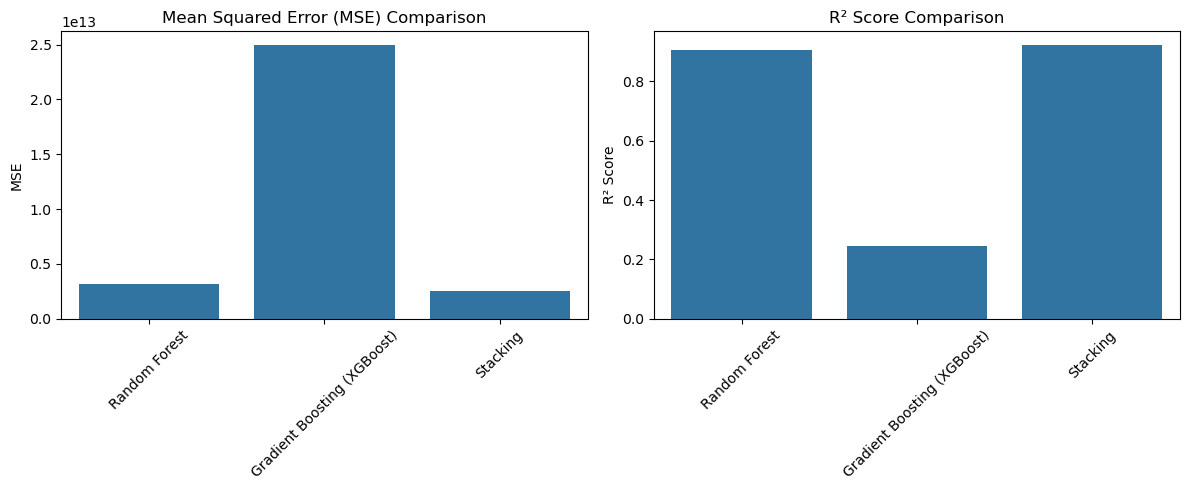

In [32]:
# Visualization 1: Bar Plot for MSE and R2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# MSE Bar Plot
sns.barplot(x=list(results.keys()), y=[results[model]['MSE'] for model in results], ax=ax1)
ax1.set_title('Mean Squared Error (MSE) Comparison')
ax1.set_ylabel('MSE')
ax1.tick_params(axis='x', rotation=45)

# R2 Bar Plot
sns.barplot(x=list(results.keys()), y=[results[model]['R2'] for model in results], ax=ax2)
ax2.set_title('R² Score Comparison')
ax2.set_ylabel('R² Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

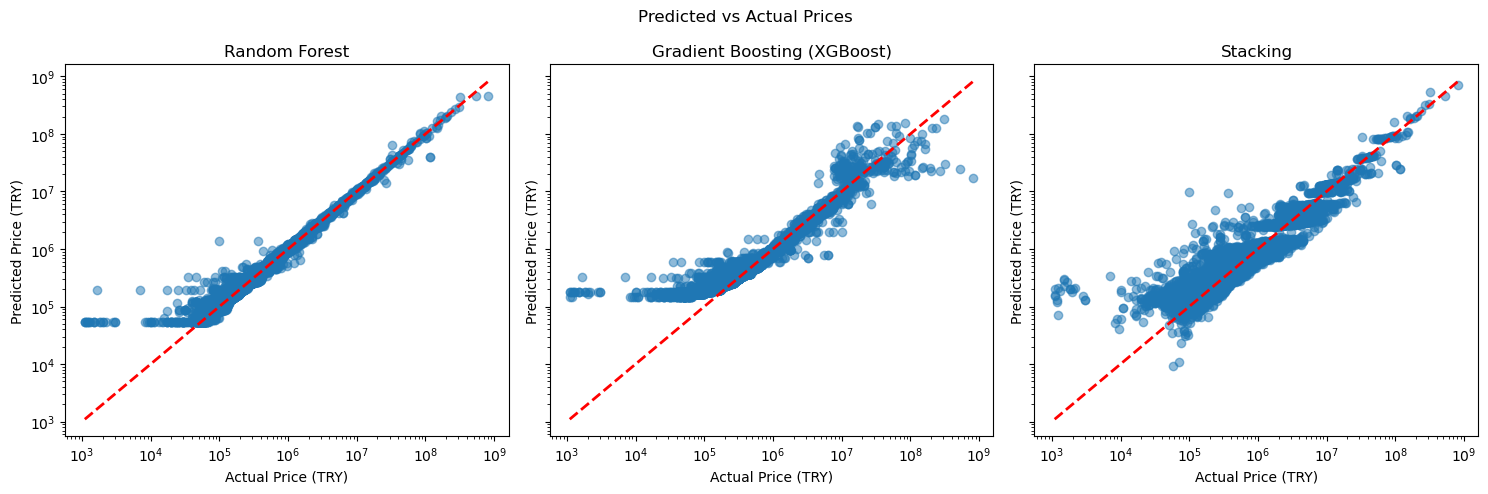

In [33]:
# Visualization 2: Scatter Plots for Predicted vs Actual Prices
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Predicted vs Actual Prices')

for i, (name, y_pred) in enumerate(predictions.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_title(name)
    axes[i].set_xlabel('Actual Price (TRY)')
    axes[i].set_ylabel('Predicted Price (TRY)')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')

plt.tight_layout()
plt.show()

In [34]:
import pickle
for name, model in models.items():
    pickle.dump(model, open(name+'.pkl', 'wb'))
    loaded_model = pickle.load(open(name+'.pkl', 'rb'))